<a href="https://colab.research.google.com/github/Yastek-Garza/Inteligencia_Artificial/blob/main/Practica1_INT_ART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5

#### Procesamiento de conjuntos de datos en Python

**Integrantes del equipo:**
* Francisco Yastek Garza Guardiola  2025262 IMTC
* Edgar Antonio Reyna Escobedo 2002559 IMTC
* Abner Roberto Menchaca Treviño 2048394 IMTC
* Brandon Yahir Tamez Galaviz 2127797 IMTC

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#aqui estamos importando las librerías que usaremos en este archivo de colab

In [4]:
from google.colab import files

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Bases_Datos google_Colab/Actividad_5/robot_sensors.csv")
df.shape

(1000, 4)

In [7]:
# El tamaño de los datos

print("\nEl tamaño de los datos por filas y columnas",df.shape)


El tamaño de los datos por filas y columnas (1000, 4)


In [8]:
df.head(9)

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
0,0,43.708611,9.256646,23.925585
1,1,95.564288,27.095047,23.704682
2,2,75.879455,43.647292,33.593819
3,3,63.879264,36.611244,23.743193
4,4,24.041678,40.328057,24.079246
5,5,24.039507,32.939168,31.390974
6,6,15.227525,34.613828,26.746098
7,7,87.955853,42.459783,31.650658
8,8,64.100351,12.483400,20.980492


In [9]:
df_filtered=df.dropna()
df_filtered.shape
#aqui se estan imprimiendo los datos despues de eliminar las
#celdas que tenian un 0

(913, 4)

In [10]:
 condition = (df_filtered < 0).any(axis=1)
df_filtered = df_filtered.drop(df_filtered[condition].index)
# y aqui se eliminaron las que tenian valores negativos auqne al

print(df_filtered.shape)

# parecer no habia

(913, 4)


Ahora debemos hacer la normalizacion de la informacion, en este caso resulta util realizar una normalizacion ya que los sensores detectan variaciones muy debiles por lo cual al normalizar elimina valores por asi decirlos insignificantes y al ser varibles medidos en distintas unidades al normalizarlas lleva a magnitudes a valores  equiparables, para que la grafica no salga tan rara

In [11]:
!pip install scikit-learn

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filtered)
df_scaled = pd.DataFrame(df_scaled, columns=df_filtered.columns, index=df_filtered.index)

print(df_scaled.head())

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0   -1.721106       -0.392706         -1.099361         -0.825923
1   -1.717651        1.570831          0.121176         -0.876415
2   -1.714196        0.825457          1.253712          1.383975
3   -1.710741        0.371064          0.772292         -0.867613
4   -1.707287       -1.137403          1.026604         -0.790800


Varios valores salieron negativos porque la funcion " scaler = StandardScaler() " reorganiza los valores escalandolos desde el 0 generando 2 histogramas un decreciente de 0 a (-) y la otra de 0 a (+)

In [13]:
print(df_filtered.columns)
#aqui verificamos el nombre de las columnas para poder hacer sus graficas

Index(['Tiempo (s)', 'Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)'], dtype='object')


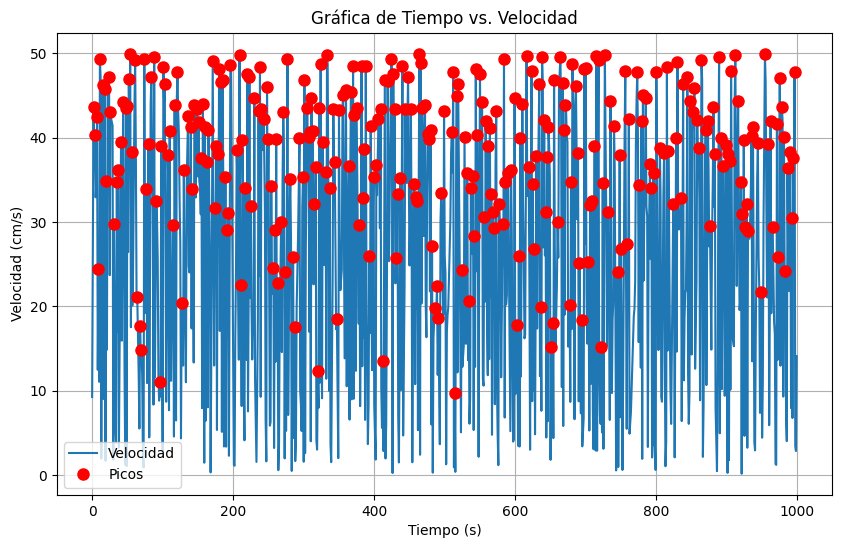

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (tu código anterior para cargar y filtrar datos) ...

# Calcular los picos (crestas)
x = df_filtered['Tiempo (s)'].values
y = df_filtered['Velocidad (cm/s)'].values
picos_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1  # Indices de los picos
picos_x = x[picos_indices]
picos_y = y[picos_indices]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Tiempo (s)'], df_filtered['Velocidad (cm/s)'], label='Velocidad')  # Agregar label para la leyenda
plt.plot(picos_x, picos_y, 'ro', markersize=8, label='Picos')  # Marcar los picos con puntos rojos
plt.title('Gráfica de Tiempo vs. Velocidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (cm/s)')
plt.grid(True)
plt.legend()  # Mostrar la leyenda
plt.show()

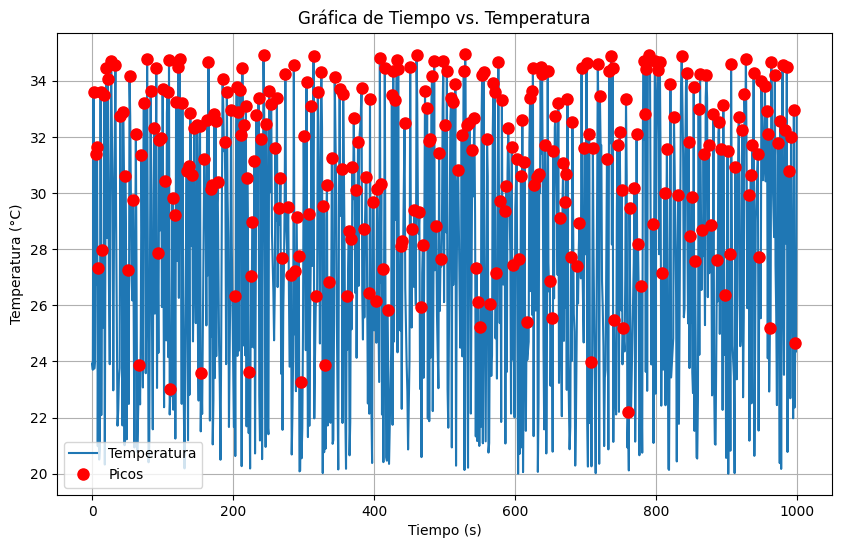

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (tu código anterior para cargar y filtrar datos) ...

# Calcular los picos (crestas) - Ahora para Temperatura
x = df_filtered['Tiempo (s)'].values
y = df_filtered['Temperatura (°C)'].values  # Cambiamos 'Velocidad (cm/s)' por 'Temperatura (°C)'
picos_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1  # Indices de los picos
picos_x = x[picos_indices]
picos_y = y[picos_indices]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Tiempo (s)'], df_filtered['Temperatura (°C)'], label='Temperatura')  # Cambiamos 'Velocidad (cm/s)' por 'Temperatura (°C)'
plt.plot(picos_x, picos_y, 'ro', markersize=8, label='Picos')  # Marcar los picos con puntos rojos
plt.title('Gráfica de Tiempo vs. Temperatura')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')  # Cambiamos la etiqueta del eje y
plt.grid(True)
plt.legend()  # Mostrar la leyenda
plt.show()

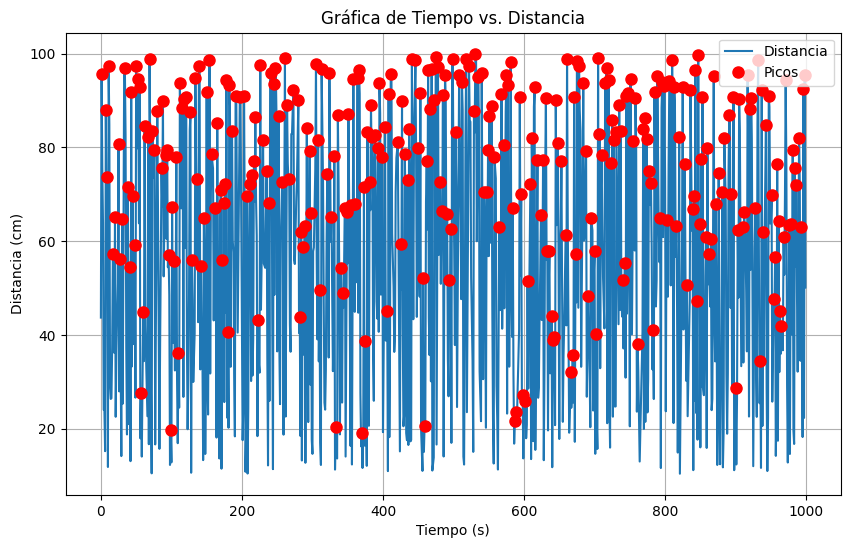

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your previous code to load and filter data) ...

# Calculate the peaks (crests) - Now for Distance
x = df_filtered['Tiempo (s)'].values
y = df_filtered['Distancia (cm)'].values  # Changed to 'Distancia (cm)'
picos_indices = np.where((y[1:-1] > y[:-2]) & (y[1:-1] > y[2:]))[0] + 1  # Indices of the peaks
picos_x = x[picos_indices]
picos_y = y[picos_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['Tiempo (s)'], df_filtered['Distancia (cm)'], label='Distancia')  # Changed to 'Distancia (cm)'
plt.plot(picos_x, picos_y, 'ro', markersize=8, label='Picos')  # Mark peaks with red dots
plt.title('Gráfica de Tiempo vs. Distancia')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (cm)')  # Changed y-axis label
plt.grid(True)
plt.legend()  # Show legend
plt.show()